# Importing libraries

In [1]:
# importing the variables from preprocessing
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r classes

In [2]:
# importing sklearn packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize

In [3]:
# model evaluation packages
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# importing libraries
import matplotlib.pyplot as plt

# Training model with Decision Tree

In [5]:
clf = DecisionTreeClassifier()

In [6]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred = clf.predict(X_test)

# Evaluation of model

In [8]:
# calculate f1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score: ",f1)

F1-score:  0.8739647667438332


In [9]:
# calculate accuraccy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8755


In [10]:
# calculate recall
recall = recall_score(y_test,y_pred,average='macro')
print("Recall: ",recall)

Recall:  0.8738747324139513


In [11]:
# calculate precision
precision = precision_score(y_test,y_pred,average='macro')
print("Precision: ",precision)

Precision:  0.8741378420483702


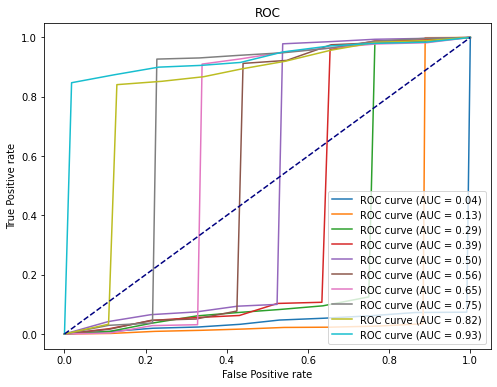

In [12]:
# calculate the roc

# convert the labels to one-hot encoded format
y_test_encoded = label_binarize(y_test,classes=classes)

# compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:,i],y_pred)
    roc_auc[i]=auc(fpr[i],tpr[i])

# plot the Roc curve for each class
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    plt.plot(fpr[i],tpr[i], label='ROC curve (AUC = %0.2f)' % roc_auc[i])
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
# confusion matric
cm = confusion_matrix(y_test,y_pred)

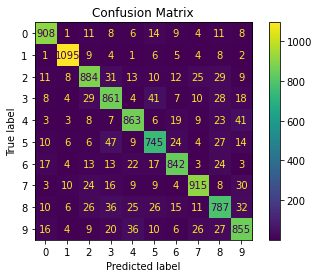

In [14]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classes)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()